# 1 Импорт файлов задания

## Загружаем данные

In [2]:
# скачиваем исходные данные с kaggle

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.competition_download_file('python-and-analyze-data-final-project', 'gender_test_kaggle_sample_submission.csv', path='kaggle_datasets', quiet=True)
api.competition_download_file('python-and-analyze-data-final-project', 'gender_train.csv', path='kaggle_datasets', quiet=True)
api.competition_download_file('python-and-analyze-data-final-project', 'tr_mcc_codes.csv', path='kaggle_datasets', quiet=True)
api.competition_download_file('python-and-analyze-data-final-project', 'tr_types.csv', path='kaggle_datasets', quiet=True)
api.competition_download_file('python-and-analyze-data-final-project', 'transactions.csv', path='kaggle_datasets', quiet=True)

In [3]:
# открываем файлы

import pandas as pd
pd.set_option('max_colwidth', 400)

transactions = pd.read_csv('kaggle_datasets/transactions.csv.zip', delimiter=',')
gender_train = pd.read_csv('kaggle_datasets/gender_train.csv', delimiter=',')
tr_mcc_codes = pd.read_csv('kaggle_datasets/tr_mcc_codes.csv', delimiter=';')
tr_types = pd.read_csv('kaggle_datasets/tr_types.csv', delimiter=';')

## Анализ исходных файлов

У нас есть 4 файла в исходных данных. Проведем их поверхностный анализ.

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6849346 entries, 0 to 6849345
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   tr_datetime  object 
 2   mcc_code     int64  
 3   tr_type      int64  
 4   amount       float64
 5   term_id      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 313.5+ MB


In [10]:
# посчитаем количество  уникальных клиентов

transactions.customer_id.nunique()

15000

In [12]:
gender_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  8400 non-null   int64
 1   gender       8400 non-null   int64
dtypes: int64(2)
memory usage: 131.4 KB


In [13]:
tr_mcc_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mcc_code         184 non-null    int64 
 1   mcc_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [14]:
tr_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tr_type         155 non-null    int64 
 1   tr_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


## Выводы

Итого у нас есть:
- датасет из 6,8 миллионов транзакций по 15000 клиентам
- обучающая разметка гендера по 8400 клиентам
- справочник отраслей MCC из 184 значений
- справочник типов операций из 155 значений

Решение выглядит так:

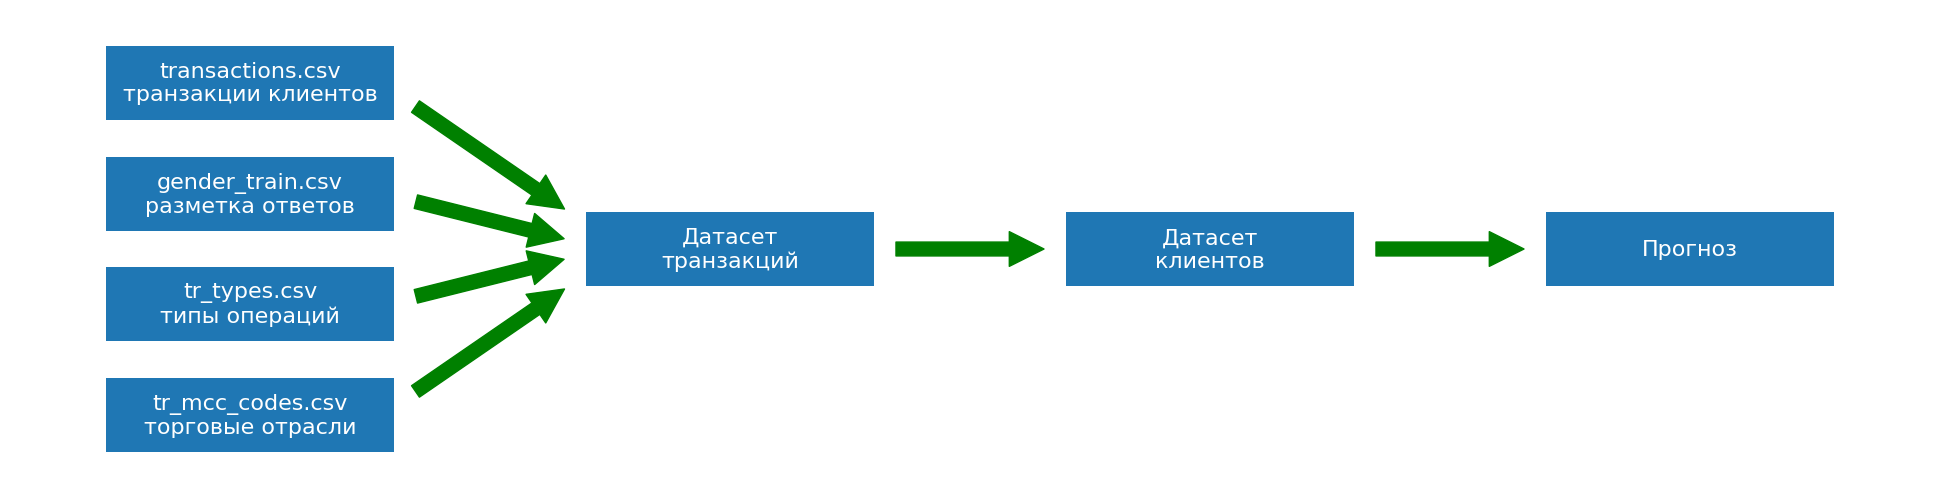

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# https://matplotlib.org/stable/api/patches_api.html

fig = plt.figure()
ax = fig.add_axes([0, 0, 3, 1])
plt.ylim((0, 1.3))

ax.add_patch(patches.Rectangle((0.05, 1), 0.15, 0.2,))
ax.add_patch(patches.Rectangle((0.05, 0.7), 0.15, 0.2,))
ax.add_patch(patches.Rectangle((0.05, 0.4), 0.15, 0.2))
ax.add_patch(patches.Rectangle((0.05, 0.1), 0.15, 0.2))
ax.add_patch(patches.Rectangle((0.3, 0.55), 0.15, 0.2))
ax.add_patch(patches.Rectangle((0.55, 0.55), 0.15, 0.2))
ax.add_patch(patches.Rectangle((0.8, 0.55), 0.15, 0.2))


def add_arrow(ax, x, y):
        ax.add_patch(patches.FancyArrowPatch(x, y,
        mutation_scale=50,transform=ax.transAxes, linewidth=None, color='g'))

add_arrow(ax, (0.21, 0.4), (0.29, 0.48))
add_arrow(ax, (0.21, 0.6), (0.29, 0.52))
add_arrow(ax, (0.21, 0.8), (0.29, 0.58))
add_arrow(ax, (0.21, 0.2), (0.29, 0.42))
add_arrow(ax, (0.46, 0.5), (0.54, 0.5))
add_arrow(ax, (0.71, 0.5), (0.79, 0.5))
        

def add_text(ax, x, y, text):
    ax.text(x, y, text, fontsize=16,horizontalalignment='center',verticalalignment='center', c='w')

add_text(ax, 0.125, 1.1, 'transactions.csv\nтранзакции клиентов')
add_text(ax, 0.125, 0.8, 'gender_train.csv\nразметка ответов')
add_text(ax, 0.125, 0.5, 'tr_types.csv\nтипы операций')
add_text(ax, 0.125, 0.2, 'tr_mcc_codes.csv\nторговые отрасли')

add_text(ax, 0.375, 0.65, 'Датасет\nтранзакций')
add_text(ax, 0.625, 0.65, 'Датасет\nклиентов')
add_text(ax, 0.875, 0.65, 'Прогноз')


ax.set_axis_off()
plt.show()

Следующим шагом соберем из исходных файлов датасет транзакций.